# Chapter 7

In [1]:
import sympy as sp
from sympy import symbols, sqrt, init_printing
from sympy_equation import Eqn, solve, table_of_expressions
from ambiance import Atmosphere
import numpy as np
import pint
import pygasflow
from pygasflow import *
from pygasflow.atd import *
init_printing()
pygasflow.defaults.solver_to_dict = True

ureg = pint.UnitRegistry()
# use "~P" to format units with unicode
ureg.formatter.default_format = "~"
pygasflow.defaults.pint_ureg = ureg
K = ureg.K
m = ureg.m
km = ureg.km
s = ureg.s
J = ureg.J
W = ureg.W
kg = ureg.kg
deg = ureg.deg
atm = ureg.atm
N = ureg.N
Q_ = ureg.Quantity

## P 7.1

In [2]:
from pygasflow.atd.avf.thickness_fp import (
    deltas_lam_ic,
    deltas_tur_ic,
)
Re_u = 1e06 / m
x = 1 * m

In [3]:
Re = Re_u * x
Re

<Quantity(1000000.0, 'dimensionless')>

In [4]:
res1_lam = deltas_lam_ic(x, Re)
res1_lam.show()

key      quantity     
----------------------
delta    δ [m]             0.00500000
delta_1  δ_1 [m]           0.00172080
delta_2  δ_2 [m]           0.00066410
H12      H12               2.59117603


In [5]:
res1_tur = deltas_tur_ic(x, Re)
res1_tur.show()

key       quantity     
-----------------------
delta     δ [m]             0.02334542
delta_vs  δ_vs [m]          0.00011569
delta_sc  δ_sc [m]          0.00053538
delta_1   δ_1 [m]           0.00292133
delta_2   δ_2 [m]           0.00227145
H12       H12               1.28611111


## P 7.2

In [6]:
x = 10 * m
Re = Re_u * x

In [7]:
res2_lam = deltas_lam_ic(x, Re)
res2_lam.show()

key      quantity     
----------------------
delta    δ [m]             0.01581139
delta_1  δ_1 [m]           0.00544165
delta_2  δ_2 [m]           0.00210007
H12      H12               2.59117603


In [8]:
res2_tur = deltas_tur_ic(x, Re)
res2_tur.show()

key       quantity     
-----------------------
delta     δ [m]             0.14729965
delta_vs  δ_vs [m]          0.00014565
delta_sc  δ_sc [m]          0.00084852
delta_1   δ_1 [m]           0.01843236
delta_2   δ_2 [m]           0.01433186
H12       H12               1.28611111


## P 7.3

### (a)

In [9]:
res1_lam["delta"] / res2_lam["delta"]

<Quantity(0.316227766, 'dimensionless')>

In [10]:
res1_lam["delta_1"] / res2_lam["delta_1"]

<Quantity(0.316227766, 'dimensionless')>

In [11]:
res1_lam["delta_2"] / res2_lam["delta_2"]

<Quantity(0.316227766, 'dimensionless')>

In [12]:
res1_tur["delta"] / res2_tur["delta"]

<Quantity(0.158489319, 'dimensionless')>

In [13]:
res1_tur["delta_1"] / res2_tur["delta_1"]

<Quantity(0.158489319, 'dimensionless')>

In [14]:
res1_tur["delta_2"] / res2_tur["delta_2"]

<Quantity(0.158489319, 'dimensionless')>

In [15]:
res1_tur["delta_sc"] / res2_tur["delta_sc"]

<Quantity(0.630957344, 'dimensionless')>

In [16]:
res1_tur["delta_vs"] / res2_tur["delta_vs"]

<Quantity(0.794328235, 'dimensionless')>

The thickness of the boundary layer grows as the flow progresses over the flat plate.

### (b)

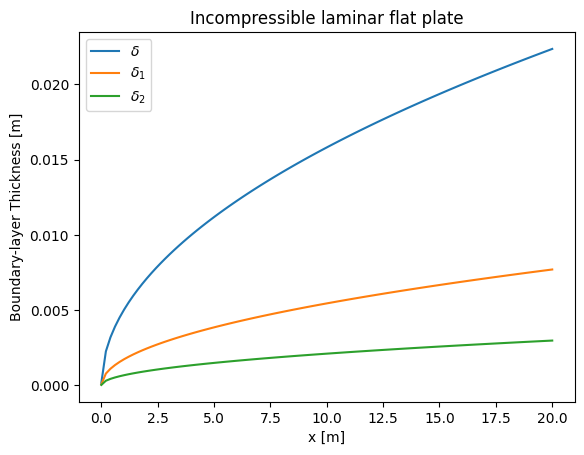

In [17]:
import matplotlib.pyplot as plt

x = np.linspace(1e-03, 20, 100) * m
Re = Re_u * x
r1 = deltas_lam_ic(x, Re)
# discard units
r1 = {k: v.magnitude if isinstance(v, Q_) else v for k, v in r1.items()}
x = x.magnitude

fig, ax = plt.subplots()
ax.plot(x, r1["delta"], label=r"$\delta$")
ax.plot(x, r1["delta_1"], label=r"$\delta_{1}$")
ax.plot(x, r1["delta_2"], label=r"$\delta_{2}$")
ax.legend()
ax.set_xlabel("x [m]")
ax.set_ylabel("Boundary-layer Thickness [m]")
ax.set_title("Incompressible laminar flat plate")
plt.show()

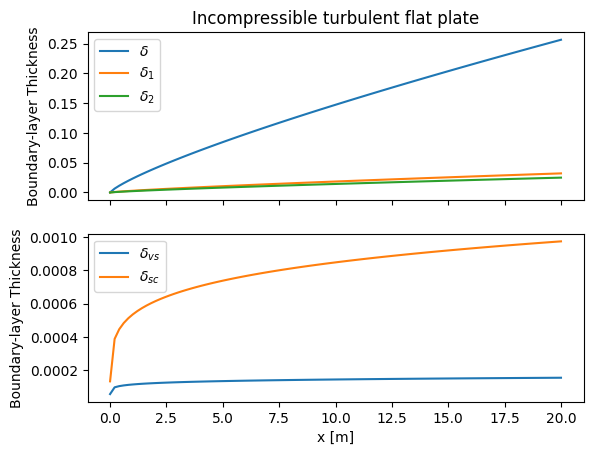

In [18]:
x = np.linspace(1e-03, 20, 100) * m
Re = Re_u * x
r2 = deltas_tur_ic(x, Re)
# discard units
r2 = {k: v.magnitude if isinstance(v, Q_) else v for k, v in r2.items()}
x = x.magnitude

fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
ax1.plot(x, r2["delta"], label=r"$\delta$")
ax1.plot(x, r2["delta_1"], label=r"$\delta_{1}$")
ax1.plot(x, r2["delta_2"], label=r"$\delta_{2}$")
ax1.legend()
ax2.plot(x, r2["delta_vs"], label=r"$\delta_{vs}$")
ax2.plot(x, r2["delta_sc"], label=r"$\delta_{sc}$")
ax2.legend()
ax2.set_xlabel("x [m]")
ax1.set_ylabel("Boundary-layer Thickness")
ax2.set_ylabel("Boundary-layer Thickness")
ax1.set_title("Incompressible turbulent flat plate")
plt.show()

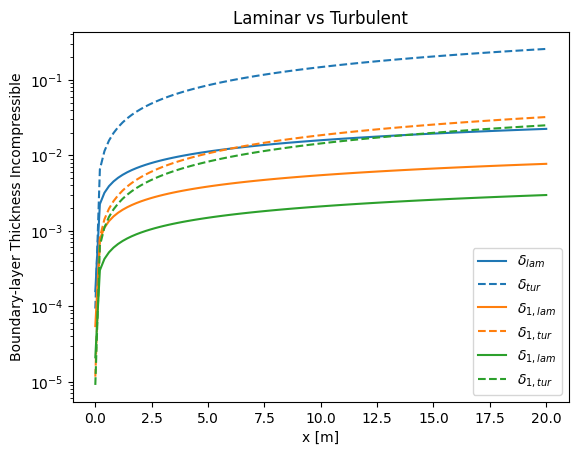

In [19]:
import matplotlib.cm as cm
from itertools import cycle

colors = cycle(cm.tab10.colors)
fig, ax = plt.subplots()
c = next(colors)
ax.plot(x, r1["delta"], color=c, label=r"$\delta_{lam}$")
ax.plot(x, r2["delta"], '--', color=c, label=r"$\delta_{tur}$")
c = next(colors)
ax.plot(x, r1["delta_1"], color=c, label=r"$\delta_{1, lam}$")
ax.plot(x, r2["delta_1"], '--', color=c, label=r"$\delta_{1, tur}$")
c = next(colors)
ax.plot(x, r1["delta_2"], color=c, label=r"$\delta_{1, lam}$")
ax.plot(x, r2["delta_2"], '--', color=c, label=r"$\delta_{1, tur}$")
ax.legend()
ax.set_xlabel("x [m]")
ax.set_ylabel("Boundary-layer Thickness Incompressible")
ax.set_title("Laminar vs Turbulent")
ax.set_yscale("log")
plt.show()

## P 7.4

The wall shear stress for a compressible flat plate is (eq. 7.145):

$$
\begin{aligned}
\tau_{w} &= C \frac{\rho_{\infty} u_{\infty}^{2}}{\left(Re_{\infty, x}\right)^{n}} \left(\frac{T^{*}}{T_{\infty}}\right)^{n (1 + \omega) - 1} \\
&= C \frac{\rho_{\infty} u_{\infty}^{2}}{\left(Re_{\infty}^{u}\right)^{n}} \frac{1}{x^{n}} \left(\frac{T^{*}}{T_{\infty}}\right)^{n (1 + \omega) - 1}
\end{aligned}
$$

The friction drag is given by:

$$
\begin{aligned}
D_{f} &= \int_{A} \tau_{w} dA = \int_{0}^{L_{ref}} \tau_{w} b \, dx = \frac{A_{ref}}{L_{ref}} \int_{0}^{L_{ref}} \tau_{w} \, dx \\
&= \frac{A_{ref}}{L_{ref}} C \frac{\rho_{\infty} u_{\infty}^{2}}{\left(Re_{\infty}^{u}\right)^{n}} \left(\frac{T^{*}}{T_{\infty}}\right)^{n (1 + \omega) - 1} \int_{0}^{L_{ref}} \frac{1}{x^{n}}  \, dx \\
&= \frac{A_{ref}}{L_{ref}} C \frac{\rho_{\infty} u_{\infty}^{2}}{\left(Re_{\infty}^{u}\right)^{n}} \left(\frac{T^{*}}{T_{\infty}}\right)^{n (1 + \omega) - 1} \frac{L_{ref}^{1 - n}}{1 - n} \\
&= \frac{A_{ref}}{L_{ref}} C \frac{\rho_{\infty} u_{\infty}^{2}}{\left(Re_{\infty, L}\right)^{n}} \left(\frac{T^{*}}{T_{\infty}}\right)^{n (1 + \omega) - 1} \frac{L_{ref}}{1 - n} \\
&= A_{ref} \frac{C}{1 - n} \frac{\rho_{\infty} u_{\infty}^{2}}{\left(Re_{\infty, L}\right)^{n}} \left(\frac{T^{*}}{T_{\infty}}\right)^{n (1 + \omega) - 1} \\
&= \frac{1}{2} \rho_{\infty} u_{\infty}^{2} C_{D,f} A_{ref}
\end{aligned}
$$


From which the average friction coefficient can be determined:

$$
C_{D, f} = \frac{2C}{1 - n} \frac{1}{\left(Re_{\infty, L}\right)^{n}} \left(\frac{T^{*}}{T_{\infty}}\right)^{n (1 + \omega) - 1}
$$

## P 7.5

In [20]:
from pygasflow.atd.avf.wall_shear_stress_fp import wss_c

In [21]:
M_inf = 6
H = 30e03 * m
A_ref = 1860 * m**2
L_ref = 80 * m
gamma = 1.4
R = 287.05 * J / (kg * K)
Pr_star = 0.74
Tw1 = 1000 * K
Tw2 = 2000 * K

In [22]:
atmosphere = Atmosphere(H.magnitude)
T_inf = atmosphere.temperature[0] * K
rho_inf = atmosphere.density[0] * kg / m**3
T_inf, rho_inf

(<Quantity(226.509084, 'kelvin')>,
 <Quantity(0.0184101009, 'kilogram / meter ** 3')>)

In [23]:
a_inf = sound_speed(gamma, R, T_inf).to("m/s")
v_inf = M_inf * a_inf
v_inf

<Quantity(1810.24291, 'meter / second')>

In [24]:
mu = viscosity_air_power_law(T_inf)
mu

<Quantity(1.57651412e-05, 'kilogram / meter / second')>

In [25]:
Re_infL = Reynolds(rho_inf, v_inf, mu, L_ref)
Re_infL

<Quantity(1.69116174e+08, 'dimensionless')>

In [26]:
q_inf = 0.5 * rho_inf * v_inf**2
q_inf

<Quantity(30164.7606, 'kilogram / meter / second ** 2')>

In [27]:
rs = recovery_factor(Pr_star, laminar=True)
rs

In [28]:
T_star1 = reference_temperature(T_inf, Tw1, M_inf, rs)
T_star1

<Quantity(921.897704, 'kelvin')>

In [29]:
# Compute the wall shear stress and friction coefficients for a
# compressible flat plate
res1 = wss_c(rho_inf, v_inf, Re_infL, T_star1 / T_inf, laminar=True)
res1.show()

key     quantity              
------------------------------
tau_w   τw [kg / m / s ** 2]       1.20474712
cf      cf []                      0.00003994
CDf     CDf []                     0.00007988


In [30]:
CDf1 = res1["CDf"]
D1 = 2 * q_inf * CDf1 * A_ref
D1 = D1.to("N")
D1

<Quantity(8963.31855, 'newton')>

In [31]:
T_star2 = reference_temperature(T_inf, Tw2, M_inf, rs)
res2 = wss_c(rho_inf, v_inf, Re_infL, T_star2 / T_inf, laminar=True)
CDf2 = res2["CDf"]
D2 = 2 * q_inf * CDf2 * A_ref
D2 = D2.to("N")
D2

<Quantity(8308.76255, 'newton')>

## P 7.6

In [32]:
res1 = wss_c(rho_inf, v_inf, Re_infL, T_star1 / T_inf, laminar=False)
CDf1 = res1["CDf"]
D1 = 2 * q_inf * CDf1 * A_ref
D1 = D1.to("N")
D1

<Quantity(73317.4665, 'newton')>

In [33]:
T_star2 = reference_temperature(T_inf, Tw2, M_inf, rs)
res2 = wss_c(rho_inf, v_inf, Re_infL, T_star2 / T_inf, laminar=False)
CDf2 = res2["CDf"]
D2 = 2 * q_inf * CDf2 * A_ref
D2 = D2.to("N")
D2

<Quantity(54843.2376, 'newton')>

## P 7.8

In [34]:
M_inf = 6
H = 30e03 * m
alpha = 6 * deg
A_ref = 1860 * m**2
L_ref = 80 * m
gamma = 1.4
Pr_star = 0.74

# windward side
M_w = 5.182
Re_wu = 3.123e06 / m
u_w = 1773.63 * m / s
rho_w = 0.0327 * kg / m**3
T_w = 291.52 * K
T_ww = 1000 * K

# leeward side
M_l = 6.997
Re_lu = 1.294e06 / m
u_l = 1840.01 * m / s
rho_l = 0.00927 * kg / m**3
T_l = 172.12 * K
T_wl = 800 * K

In [35]:
atmosphere = Atmosphere(H.magnitude)
T_inf = atmosphere.temperature[0] * K
rho_inf = atmosphere.density[0] * kg / m**3
T_inf, rho_inf

(<Quantity(226.509084, 'kelvin')>,
 <Quantity(0.0184101009, 'kilogram / meter ** 3')>)

In [36]:
rs = recovery_factor(Pr_star, laminar=False)
Tr_w = recovery_temperature(T_w, M_w, rs, gamma)
Tr_l = recovery_temperature(T_l, M_l, rs, gamma)
Tr_w, Tr_l

(<Quantity(1707.65202, 'kelvin')>, <Quantity(1696.50847, 'kelvin')>)

In [37]:
Ts_w = reference_temperature(T_w, T_ww, Tr=Tr_w)
Ts_l = reference_temperature(T_l, T_wl, Tr=Tr_l)
Ts_w, Ts_l

(<Quantity(957.309044, 'kelvin')>, <Quantity(821.425463, 'kelvin')>)

In [38]:
res_w = wss_c(rho_w, u_w, Re_wu * L_ref, Ts_w / T_w, laminar=False)
res_w.show()

key     quantity              
------------------------------
tau_w   τw [kg / m / s ** 2]      28.71150588
cf      cf []                      0.00055823
CDf     CDf []                     0.00069779


In [39]:
res_l = wss_c(rho_l, u_l, Re_lu * L_ref, Ts_l / T_l, laminar=False)
res_l.show()

key     quantity              
------------------------------
tau_w   τw [kg / m / s ** 2]       8.13304710
cf      cf []                      0.00051828
CDf     CDf []                     0.00064785


In [40]:
D_w = 0.5 * rho_w * u_w**2 * res_w["CDf"] * A_ref
D_w = D_w.to("N")
D_w

<Quantity(66754.2512, 'newton')>

In [41]:
D_l = 0.5 * rho_l * u_l**2 * res_l["CDf"] * A_ref
D_l = D_l.to("N")
D_l

<Quantity(18909.3345, 'newton')>

In [42]:
D = D_w + D_l
Df = D * np.cos(alpha.to("radians"))
Df

<Quantity(85194.3116, 'newton')>

In [43]:
Lf = -D * np.sin(alpha.to("radians"))
Lf

<Quantity(-8954.28297, 'newton')>

## P 7.9

In [44]:
L_inviscid = 1219344.1612489037 * N
D_inviscid = 128158.2355937337 * N

In [45]:
L = Lf + L_inviscid
L

<Quantity(1210389.88, 'newton')>

In [46]:
D = Df + D_inviscid
D

<Quantity(213352.547, 'newton')>

In [47]:
L / D

<Quantity(5.6731916, 'dimensionless')>